In [1]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from reading_workflow.data import clean_data

In [2]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2017.csv')
data_2016 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2016.csv')

(0, 332624.6860860001)

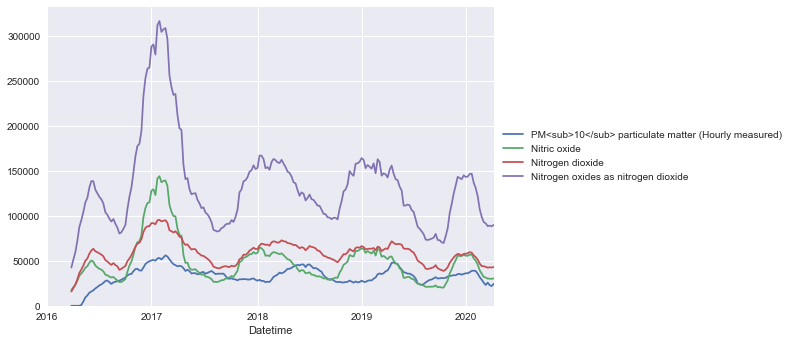

In [3]:
#concatenate all the years into a single dataset and plot the full timeline as a graph
data_total = pd.concat([data_2020,data_2019,data_2018,data_2017,data_2016]) #create a merged dataset of all the yearly data combined
plot = data_total.resample('W').sum().rolling(13).sum().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

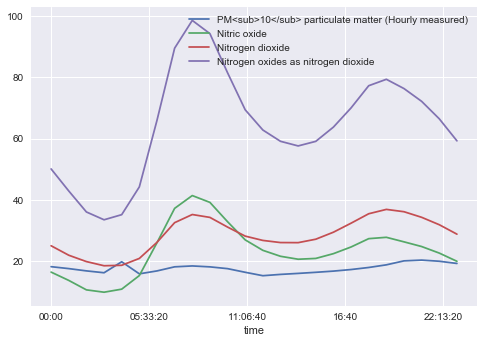

In [4]:
data_total.groupby(data_total.index.time).mean().plot()

Text(0.5, 0, 'Week')

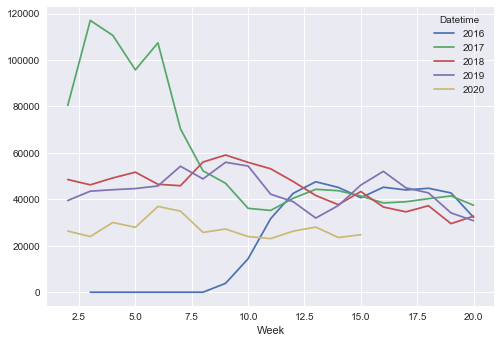

In [5]:
data_total_daily = data_total.resample('W').sum().rolling(4).sum()
pivoted = data_total_daily.pivot_table('Nitrogen oxides as nitrogen dioxide', 
                                        index=[data_total_daily.index.week], 
                                        columns=data_total_daily.index.year)
pivoted.iloc[1:20].plot()
plt.xlabel('Week')